In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [2]:
drugs = pd.read_csv("drugsComTest_raw.tsv", sep="\t", parse_dates=["date"])

In [3]:
drugs.condition = drugs.condition.astype("category")
#drugs.rating = drugs.rating.astype("category")
# we need to filter out any condition that is HTML: contains </span> tag
pattern = ".*</span>.*"
filter = drugs['condition'].str.contains(pattern)
filter.fillna(False, inplace=True)
drugs = drugs[~filter]

In [4]:
average_ratings = drugs.groupby(["condition"]).rating.mean()
number_ratings = drugs.groupby(["condition"]).usefulCount.sum()
# now lets remove all </span> tags
df1 = average_ratings.to_frame()
df2 = number_ratings.to_frame()
df = df1.merge(df2, left_index=True, right_index=True)
df.dropna(inplace=True)
df = df[df.usefulCount>=1000].sort_values("rating", ascending=False)

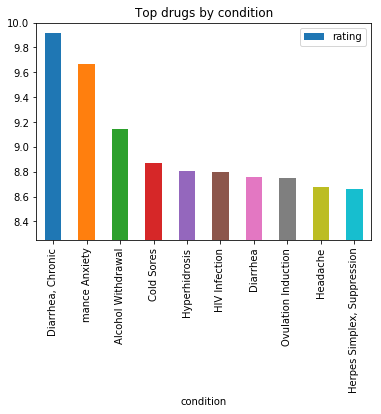

In [5]:
df.head(10).plot.bar(y="rating", ylim=(8.25,10), title = "Top drugs by condition")

condition
Depression             163185
Anxiety                 93409
Birth Control           77356
Pain                    74249
Weight Loss             49163
Bipolar Disorde         48275
Obesity                 44788
Insomnia                42777
ADHD                    39382
High Blood Pressure     38270
Name: usefulCount, dtype: int64


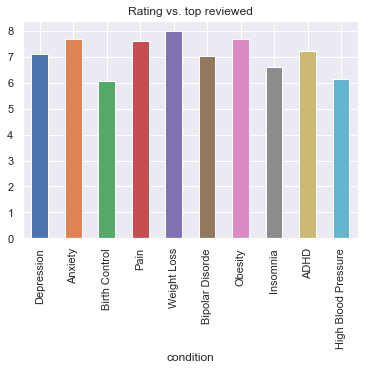

In [36]:
# need to place the total number of reviews on each bar
# remove legend and add y-label
print(df.sort_values("usefulCount", ascending=False).head(10).usefulCount)
df.sort_values("usefulCount", ascending=False).head(10).plot.bar(y="rating", legend=False, title = "Rating vs. top reviewed")

In [44]:
# now I would like to plot the distribution of the reviews, grouped by condition
# this certainly can't be the best way to do this, shouldn't groupby work?
depression = drugs[drugs.condition=="Depression"]
anxiety = drugs[drugs.condition=="Anxiety"]
birth_control = drugs[drugs.condition=="Birth Control"]
pain = drugs[drugs.condition=="Pain"]
weight_loss = drugs[drugs.condition=="Weight Loss"]
bipolar = drugs[drugs.condition=="Bipolar Disorde"]
obesity = drugs[drugs.condition=="Obesity"]
insomnia = drugs[drugs.condition=="Insomnia"]
adhd = drugs[drugs.condition=="ADHD"]
hbp = drugs[drugs.condition=="High Blood Pressure"]

In [69]:
labels = ["Depression","Anxiety", "Birth Control", "Pain", "Weight Loss",
          "Bipolar Disorder","Obesity", "Insomnia", "ADHD", "High Blood Pressure"]
colors = ["blue", "orange", "green", "red", "purple", 
          "brown", "magenta", "grey", "gold", "cyan"]

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


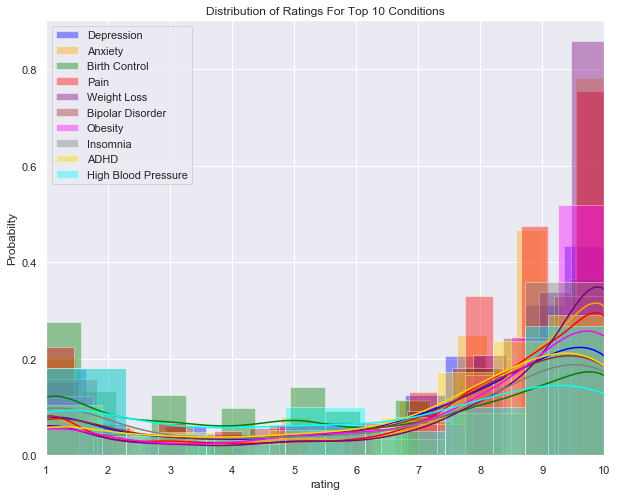

In [81]:
plt.figure(figsize=(10, 8))
plt.xlim(1,10)
sns.distplot(depression.rating, color=colors[0])
sns.distplot(anxiety.rating, color=colors[1])
sns.distplot(birth_control.rating, color=colors[2])
sns.distplot(pain.rating, color=colors[3])
sns.distplot(weight_loss.rating, color=colors[4])
sns.distplot(bipolar.rating, color=colors[5])
sns.distplot(obesity.rating, color=colors[6])
sns.distplot(insomnia.rating, color=colors[7])
sns.distplot(adhd.rating, color=colors[8])
sns.distplot(hbp.rating, color=colors[9])
plt.legend(labels)
plt.title("Distribution of Ratings For Top 10 Conditions")
plt.ylabel("Probabilty")
plt.show()

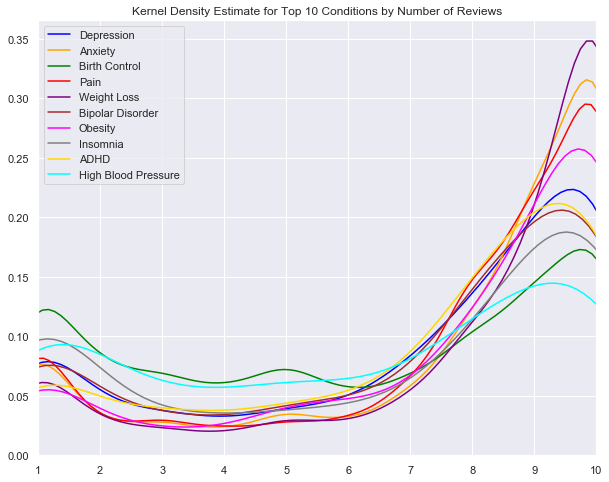

In [82]:
#fig, ax = plt.subplots()
plt.figure(figsize=(10, 8))
plt.xlim(1,10)
sns.kdeplot(depression.rating, legend=False, color=colors[0])
sns.kdeplot(anxiety.rating, legend=False, color = colors[1])
sns.kdeplot(birth_control.rating, legend=False, color = colors[2])
sns.kdeplot(pain.rating, legend=False, color = colors[3])
sns.kdeplot(weight_loss.rating, legend=False, color = colors[4])
sns.kdeplot(bipolar.rating, legend=False, color=colors[5])
sns.kdeplot(obesity.rating, legend=False, color=colors[6])
sns.kdeplot(insomnia.rating, legend=False, color=colors[7])
sns.kdeplot(adhd.rating, legend=False, color=colors[8])
sns.kdeplot(hbp.rating, legend=False, color=colors[9])
plt.legend(labels)
plt.title("Kernel Density Estimate for Top 10 Conditions by Number of Reviews")
plt.show()